#Projeto Reconhecimento de Digitos
###Grupo: Vitor Zimbrunes Pamplona, Yan borges Simões de Araújo
###Matrícula: 20190038570, 20190036216
###Data: 04/04/2023
###Última alteração: 27/04/2023

In [205]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

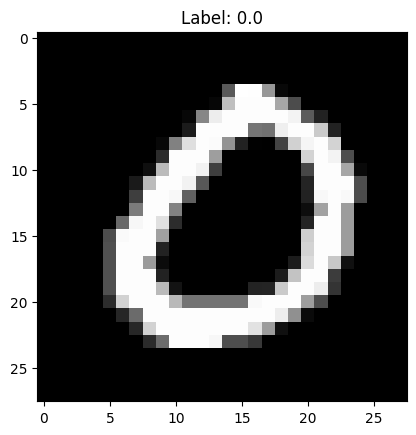

In [206]:
# Carregando dados
train_data = np.genfromtxt('train.csv', delimiter=';', skip_header=1)
test_data = np.genfromtxt('test.csv', delimiter=';', skip_header=1)

# Preparação dos dados
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

X_teste = test_data[:, 1:]
y_teste = test_data[:, 0]

# Dividir os dados entre Treino e validação
train_size = int(0.8 * len(train_data))
X_train, X_val = np.split(X_train, [train_size])
y_train, y_val = np.split(y_train, [train_size])


# Visualizando uma amostra dos dados
first_image = X_train[[0], :]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.title('Label: {}'.format(y_train[0]))
plt.show()

#Intensidade Treino e Teste

In [207]:
I_treino = X_train[:, 1:].sum(axis=1)/255
print(I_treino)
I_teste = X_teste[:, 1:].sum(axis=1)/255
print(I_teste)

[145.43529412 118.57647059 127.6        ...  90.00784314 117.10196078
 106.6       ]
[147.93333333 131.05490196 134.89019608 ...  95.14117647 106.88235294
 117.63921569]


#Simetria Treino e Teste

In [208]:
def Simetria(X):
  # Calcula a simetria vertical da imagem
  inversa = np.fliplr(X)
  diferenca = np.abs(X - inversa)
  sv = np.sum(diferenca)/(255*2)

  # Calcula a simetria horizontal da imagem
  X_h = np.transpose(X)
  inversa_h = np.fliplr(X_h)
  diferenca_h = np.abs(X_h - inversa_h)
  sh = np.sum(diferenca_h)/(255*2)
  simetria = sh + sv

  return simetria

In [209]:
data_matrix_treino = []
for i in range(len(X_train)):
    data_matrix_treino.append(X_train[i].reshape(28, 28))

Sim_treino = []
for i in range(len(data_matrix_treino)):
    Sim_treino.append(Simetria(data_matrix_treino[i]))


In [210]:
data_matrix_teste = []
for i in range(len(X_teste)):
    data_matrix_teste.append(X_teste[i].reshape(28, 28))

Sim_teste = []
for i in range(len(data_matrix_teste)):
    Sim_teste.append(Simetria(data_matrix_teste[i]))


#Criando Train_redu e Test_redu

In [211]:
# Gerar arquivo de treino reduzido
train_redu = np.column_stack((y_train, I_treino, Sim_treino))
np.savetxt('train_redu.csv', train_redu, delimiter=';', header='label')

test_redu = np.column_stack((y_teste, I_teste, Sim_teste))
np.savetxt('test_redu.csv', test_redu, delimiter=';', header='label')

# Filtro para manter apenas as imagens com label igual a 1 ou 5
train1x5 = train_redu[(train_redu[:,0]==1) | (train_redu[:,0]==5)]
teste1x5 = test_redu[(test_redu[:,0]==1) | (test_redu[:,0]==5)]

#Plotando o Gráfico

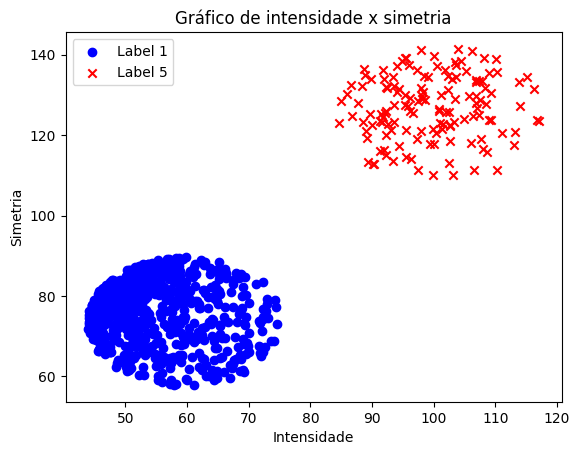

In [212]:
import matplotlib.pyplot as plt

# Índices dos dados com label igual a 1 ou 5
idx_1 = np.where(train1x5[:,0] == 1)
idx_5 = np.where(train1x5[:,0] == 5)

# Plot dos dados
plt.scatter(train1x5[idx_1,1], train1x5[idx_1,2], c='blue', label='Label 1')
plt.scatter(train1x5[idx_5,1], train1x5[idx_5,2], c='red', label='Label 5', marker = 'x')

# Legendas e rótulos dos eixos
plt.title('Gráfico de intensidade x simetria')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.legend()

# Exibir o gráfico
plt.show()

#Vetor X e y treino

In [213]:
# Extrair os valores de intensidade e similaridade para cada imagem em train1x5
X_train = []
for i in range(len(train1x5)):
  intensity = train1x5[i][1]
  simetry = train1x5[i][2]
  X_train.append([intensity, simetry])
X_train = np.array(X_train)

# Atribuir o valor alvo y treino
y_train = []
for i in range(len(train1x5)):
  if train1x5[i][0] == 1:
    y_train.append(1)
  else:
    y_train.append(-1)
y_train = np.array(y_train)

#Vetor X e y teste

In [214]:
# Extrair os valores de intensidade e similaridade para cada imagem em teste1x5
X_teste = []
for i in range(len(teste1x5)):
  intensity = teste1x5[i][1]
  simetry = teste1x5[i][2]
  X_teste.append([intensity, simetry])
X_teste = np.array(X_teste)

# Atribuir o valor alvo y teste
y_teste = []
for i in range(len(teste1x5)):
  if teste1x5[i][0] == 1:
    y_teste.append(1)
  else:
    y_teste.append(-1)
y_teste = np.array(y_teste)

#Perceptron

In [215]:
class PLA:
  def get_w(self):
    return self.w
    
  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    hasWrongClassifiedPoint = True
    bestError = len(y)
    self.w = np.zeros(len(X[0]))
    bestW = self.w
    for iter in range(1000):
      #Testa se sign(wTXn) != Yn - ponto classificado errado
      for i in range(len(y)):
        if(np.sign(np.dot(self.w, X[i])) != y[i]):
          self.w = self.w + (y[i]*X[i])
          eIN = self.errorIN(X, y)
          if(bestError > eIN):
            bestError = eIN
            bestW = self.w
    self.w = bestW
                    
  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]
    
  def h(self, x):
    return np.sign(np.dot(self.w, x))
    
  def errorIN(self, X, y):
    error = 0
    for i in range(len(y)):
      if(np.sign(np.dot(self.w, X[i])) != y[i]):
        error += 1
                
    return error

#Regressão Linear

In [216]:
class LinearRegression:
  def execute(self, _X, _y):
    X =  np.array(_X)
    y =  np.array(_y)
    xTx = np.dot(X.transpose(), X)
    inverse = np.linalg.inv(xTx)
    self.w = np.dot(np.dot( inverse, X.transpose()), y)
    
  def predict(self, _x):
    return [np.dot(self.w, xn) for xn in _x]
    
  def get_w(self):
    return self.w

#Regressão Logistica

In [217]:
class LogisticRegression:
  def __init__(self, eta=0.1, tmax=1000, batch_size=32):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = batch_size

  # Infere o vetor w da funçao hipotese
  #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
  def fit(self, _X, _y):
        
    X = np.concatenate((np.ones((len(_X),1)), _X), axis=1)
    y = np.array(_y)
        
    d = X.shape[1]
    N = X.shape[0]
    w = np.zeros(d, dtype=float)
    self.w = []
        
    for i in range(self.tmax):
      vsoma = np.zeros(d, dtype=float)

      #Escolhendo o lote de entradas
      if self.batch_size < N:
        indices = random.sample(range(N),self.batch_size)
        batchX = [X[index] for index in indices]
        batchY = [y[index] for index in indices]
      else:
        batchX = X
        batchY = y

      #computando o gradiente no ponto atual
      for xn, yn in zip(batchX, batchY):
        vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
            
      gt = vsoma/self.batch_size
      #Condicao de parada: se ||deltaF|| < epsilon (0.0001)
      if LA.norm(gt) < 0.0001 :
        break
      w = w + (self.eta*gt)

    self.w = w
        
  #funcao hipotese inferida pela regressa logistica  
  def predict_prob(self, X):
    return [(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) for x in X]

  #Predicao por classificação linear
  def predict(self, X):
    return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                else -1 for x in X]

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

#Treino dos Modelos

In [218]:
ppn = PLA()
ppn.execute(X_train, y_train)

lr = LinearRegression()
lr.execute(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

<ipython-input-217-e2743939d346>:33: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


#Gráficos

##Perceptron

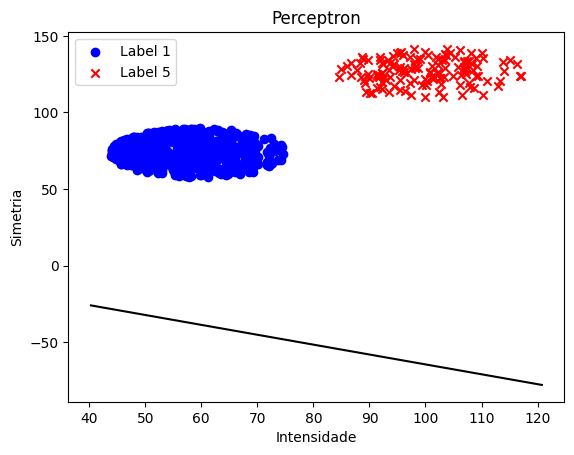

In [219]:
# Índices dos dados com label igual a 1 ou 5
idx_1 = np.where(train1x5[:,0] == 1)
idx_5 = np.where(train1x5[:,0] == 5)

# Plot dos dados
plt.scatter(train1x5[idx_1,1], train1x5[idx_1,2], c='blue', label='Label 1')
plt.scatter(train1x5[idx_5,1], train1x5[idx_5,2], c='red', label='Label 5', marker = 'x')

# Legendas e rótulos dos eixos
plt.title('Perceptron')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.legend()

# Plot da linha do perceptron
xmin, xmax = plt.xlim()
w = ppn.get_w()
b = -1
ymin, ymax = (-b - w[0]*xmin)/w[1], (-b - w[0]*xmax)/w[1]
plt.plot([xmin, xmax], [ymin, ymax], 'k-', label='Perceptron')

# Exibir o gráfico
plt.show()

##Regressão Linear

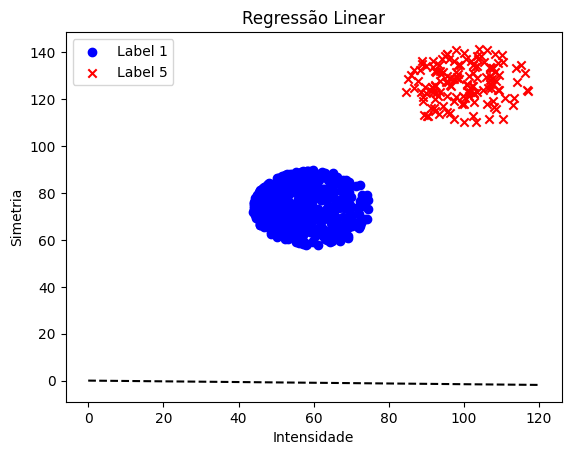

In [220]:
# Índices dos dados com label igual a 1 ou 5
idx_1 = np.where(train1x5[:,0] == 1)
idx_5 = np.where(train1x5[:,0] == 5)

# Plot dos dados
plt.scatter(train1x5[idx_1,1], train1x5[idx_1,2], c='blue', label='Label 1')
plt.scatter(train1x5[idx_5,1], train1x5[idx_5,2], c='red', label='Label 5', marker = 'x')

# Legendas e rótulos dos eixos
plt.title('Regressão Linear')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.legend()

# Regressão Linear
x1 = train1x5[idx_1,1]
y1 = train1x5[idx_1,2]
x5 = train1x5[idx_5,1]
y5 = train1x5[idx_5,2]
X = np.concatenate((np.vstack((x1, y1)).T, np.vstack((x5, y5)).T))
y = np.concatenate((np.zeros(len(x1)), np.ones(len(x5))))
xx = np.linspace(0, 120, 100)
yy = lr.predict(np.column_stack((xx, np.zeros(len(xx)))))
plt.plot(xx, yy, c='black', linestyle='--', label='Decision boundary')

##Regressão Logística

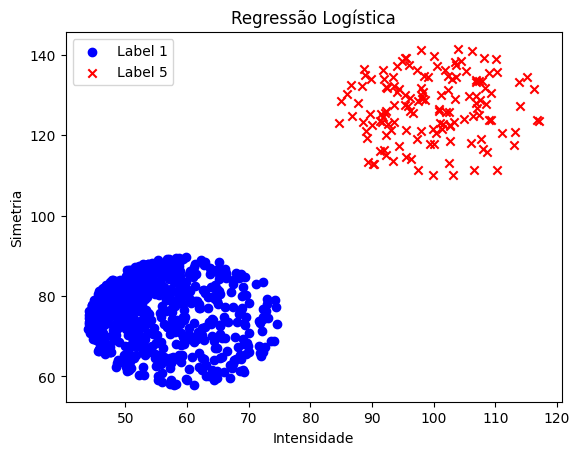

In [221]:
# Índices dos dados com label igual a 1 ou 5
idx_1 = np.where(train1x5[:,0] == 1)
idx_5 = np.where(train1x5[:,0] == 5)

# Plot dos dados
plt.scatter(train1x5[idx_1,1], train1x5[idx_1,2], c='blue', label='Label 1')
plt.scatter(train1x5[idx_5,1], train1x5[idx_5,2], c='red', label='Label 5', marker = 'x')

# Legendas e rótulos dos eixos
plt.title('Regressão Logística')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.legend()


#Matriz Confusão e Reporte de Classificação

In [222]:
def matriz_confusao(y_teste, y_pred):
  classes = np.unique(y_teste)
  n_classes = len(classes)
  matriz = np.zeros((n_classes, n_classes), dtype=int)
  for i in range(n_classes):
    for j in range(n_classes):
      matriz[i, j] = np.sum((y_teste == classes[i]) & (y_pred == classes[j]))
  return matriz

def classification_report(y_teste, y_pred):
  classes = np.unique(y_teste)
  n_classes = len(classes)
  matriz = matriz_confusao(y_teste, y_pred)
  print("Relatório de Classificação:")
  print("Classes: ", classes)
  print("Matriz de Confusão:")
  print(matriz)
  print("Acurácia: ", np.sum(np.diag(matriz)) / np.sum(matriz))
  for i in range(n_classes):
    tp = matriz[i, i]
    fp = np.sum(matriz[:, i]) - tp
    fn = np.sum(matriz[i, :]) - tp
    tn = np.sum(matriz) - tp - fp - fn
    print("Classe ", classes[i], ":")
    print("Precisão: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("F1-score: ", 2 * tp / (2 * tp + fp + fn))
    print("Support: ", np.sum(y_teste == classes[i]))
    print()


##Perceptron

##Regressão Linear

In [223]:
y_pred_lr = lr.predict(X_teste)
print('Regressão Linear')
print(classification_report(y_teste, y_pred_lr))

Regressão Linear
Relatório de Classificação:
Classes:  [-1  1]
Matriz de Confusão:
[[0 0]
 [0 0]]
Acurácia:  nan
Classe  -1 :
Precisão:  nan
Recall:  nan
F1-score:  nan
Support:  291

Classe  1 :
Precisão:  nan
Recall:  nan
F1-score:  nan
Support:  292

None


<ipython-input-222-09b251af63cb>:18: RuntimeWarning: invalid value encountered in long_scalars
  print("Acurácia: ", np.sum(np.diag(matriz)) / np.sum(matriz))
<ipython-input-222-09b251af63cb>:25: RuntimeWarning: invalid value encountered in long_scalars
  print("Precisão: ", tp / (tp + fp))
<ipython-input-222-09b251af63cb>:26: RuntimeWarning: invalid value encountered in long_scalars
  print("Recall: ", tp / (tp + fn))
<ipython-input-222-09b251af63cb>:27: RuntimeWarning: invalid value encountered in long_scalars
  print("F1-score: ", 2 * tp / (2 * tp + fp + fn))


##Regressão Logística

In [224]:
y_pred_logreg = logreg.predict(X_teste)
print('Regressão Logística')
print(classification_report(y_teste, y_pred_logreg))

Regressão Logística
Relatório de Classificação:
Classes:  [-1  1]
Matriz de Confusão:
[[  0 291]
 [  0 292]]
Acurácia:  0.5008576329331046
Classe  -1 :
Precisão:  nan
Recall:  0.0
F1-score:  0.0
Support:  291

Classe  1 :
Precisão:  0.5008576329331046
Recall:  1.0
F1-score:  0.6674285714285715
Support:  292

None


<ipython-input-222-09b251af63cb>:25: RuntimeWarning: invalid value encountered in long_scalars
  print("Precisão: ", tp / (tp + fp))


#Um contra todos

##Perceptron

##Regressão Linear

In [225]:
lr0 = LinearRegression()
y_train_0 = np.where(y_train == 0, 1, -1)
lr0.execute(X_train, y_train_0)

lr1 = LinearRegression()
y_train_1 = np.where(y_train == 1, 1, -1)
lr1.execute(X_train, y_train_1)

lr4 = LinearRegression()
y_train_4 = np.where(y_train == 4, 1, -1)
lr4.execute(X_train, y_train_4)

lr5 = LinearRegression()
y_train_5 = np.where(y_train == 5, 1, -1)
lr5.execute(X_train, y_train_5)

In [226]:
y_pred_0 = lr0.predict(X_teste)
y_pred_1 = lr1.predict(X_teste)
y_pred_4 = lr4.predict(X_teste)
y_pred_5 = lr5.predict(X_teste)

In [227]:
y_pred_final = np.zeros(y_teste.shape[0])
for i in range(len(y_pred_final)):
  if y_pred_0[i] == 1:
    y_pred_final[i] = 0
  elif y_pred_1[i] == 1:
    y_pred_final[i] = 1
  elif y_pred_4[i] == 1:
    y_pred_final[i] = 4
  elif y_pred_5[i] == 1:
    y_pred_final[i] = 5

In [228]:
print(classification_report(y_teste, y_pred_final))

Relatório de Classificação:
Classes:  [-1  1]
Matriz de Confusão:
[[0 0]
 [0 0]]
Acurácia:  nan
Classe  -1 :
Precisão:  nan
Recall:  nan
F1-score:  nan
Support:  291

Classe  1 :
Precisão:  nan
Recall:  nan
F1-score:  nan
Support:  292

None


<ipython-input-222-09b251af63cb>:18: RuntimeWarning: invalid value encountered in long_scalars
  print("Acurácia: ", np.sum(np.diag(matriz)) / np.sum(matriz))
<ipython-input-222-09b251af63cb>:25: RuntimeWarning: invalid value encountered in long_scalars
  print("Precisão: ", tp / (tp + fp))
<ipython-input-222-09b251af63cb>:26: RuntimeWarning: invalid value encountered in long_scalars
  print("Recall: ", tp / (tp + fn))
<ipython-input-222-09b251af63cb>:27: RuntimeWarning: invalid value encountered in long_scalars
  print("F1-score: ", 2 * tp / (2 * tp + fp + fn))


##Regressão Logistica

In [229]:
logreg0 = LogisticRegression()
y_train_0 = np.where(y_train == 0, 1, -1)
logreg0.fit(X_train, y_train_0)

logreg1 = LogisticRegression()
y_train_1 = np.where(y_train == 1, 1, -1)
logreg1.fit(X_train, y_train_1)

logreg4 = LogisticRegression()
y_train_4 = np.where(y_train == 4, 1, -1)
logreg4.fit(X_train, y_train_4)

logreg5 = LogisticRegression()
y_train_5 = np.where(y_train == 5, 1, -1)
logreg5.fit(X_train, y_train_5)

<ipython-input-217-e2743939d346>:33: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


In [230]:
y_pred_0 = logreg0.predict(X_teste)
y_pred_1 = logreg1.predict(X_teste)
y_pred_4 = logreg4.predict(X_teste)
y_pred_5 = logreg5.predict(X_teste)

<ipython-input-217-e2743939d346>:49: RuntimeWarning: overflow encountered in exp
  return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5


In [231]:
y_pred_final = np.zeros(y_teste.shape[0])
for i in range(len(y_pred_final)):
  if y_pred_0[i] == 1:
    y_pred_final[i] = 0
  elif y_pred_1[i] == 1:
    y_pred_final[i] = 1
  elif y_pred_4[i] == 1:
    y_pred_final[i] = 4
  elif y_pred_5[i] == 1:
    y_pred_final[i] = 5

In [232]:
print(classification_report(y_teste, y_pred_final))

Relatório de Classificação:
Classes:  [-1  1]
Matriz de Confusão:
[[  0 291]
 [  0 292]]
Acurácia:  0.5008576329331046
Classe  -1 :
Precisão:  nan
Recall:  0.0
F1-score:  0.0
Support:  291

Classe  1 :
Precisão:  0.5008576329331046
Recall:  1.0
F1-score:  0.6674285714285715
Support:  292

None


<ipython-input-222-09b251af63cb>:25: RuntimeWarning: invalid value encountered in long_scalars
  print("Precisão: ", tp / (tp + fp))
